# ARIMA -  Johnson & Johnson Sales Prediction

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7.5]
from scipy.stats import boxcox
import statsmodels.api as sm
import pmdarima as pm


In [26]:
df = pd.read_csv('jj.csv')

In [27]:
df.head(10)

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
5,1961-04-02,0.69
6,1961-07-02,0.92
7,1961-10-01,0.55
8,1962-01-01,0.72
9,1962-04-02,0.77


In [28]:
df['date'] = pd.to_datetime(df['date'])

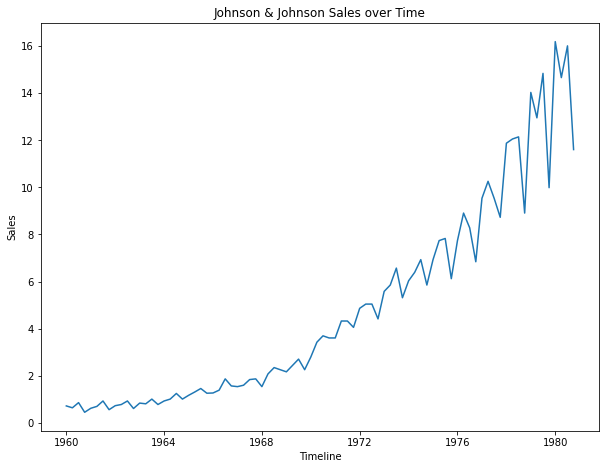

In [29]:
plt.plot(df['date'], df['data'])
plt.title('Johnson & Johnson Sales over Time')
plt.xlabel('Timeline')
plt.ylabel('Sales')
plt.show()

In [7]:
df.describe()

,data
count,84.000000
mean,4.799762
std,4.309991
min,0.440000
25%,1.247500
50%,3.510000
75%,7.132500
max,16.200000


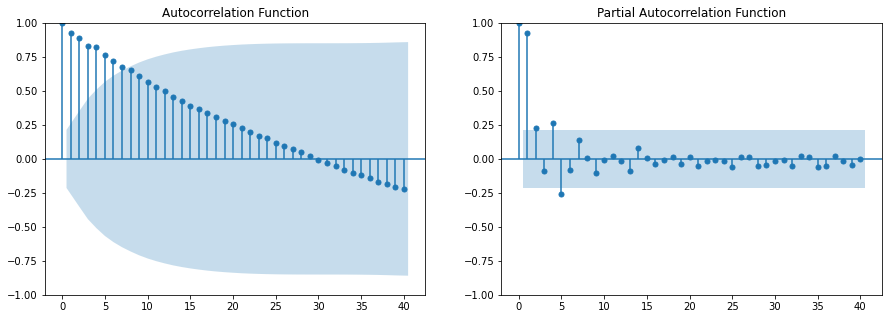

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df['data'], ax=ax[0], lags=40)
ax[0].set_title('Autocorrelation Function')
plot_pacf(df['data'], ax=ax[1], lags=40, method='ywm')
ax[1].set_title('Partial Autocorrelation Function')
plt.show()

In [9]:
adf_result = adfuller(df['data'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: 2.7420165734574735
p-value: 1.0


A p-value greater than 0.05 suggests non-stationarity

In [11]:
data = df['data'].values
log_data = np.log(data)
stationary_data = np.diff(log_data)
stationary_data_positive = stationary_data + 1
transformed_data, lambda_value = boxcox(stationary_data_positive)
print("Lambda value from Box-Cox transformation:", lambda_value)

Lambda value from Box-Cox transformation: 1.8715092684085828


In [13]:
model = pm.auto_arima(transformed_data, start_p=0, d=1, start_q=0, max_p=8, max_d=1, max_q=8, seasonal=False,
                      trace=False, error_action='ignore', suppress_warnings=True)

In [14]:
print("Best ARIMA model order:", model.order)
print("AIC value for the best model:", model.aic())

Best ARIMA model order: (4, 1, 1)
AIC value for the best model: -136.12990738464578


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   84
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -54.691
Date:                Thu, 10 Apr 2025   AIC                            121.382
Time:                        23:08:17   BIC                            135.895
Sample:                             0   HQIC                           127.212
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0345      0.032     -1.077      0.282      -0.097       0.028
ar.L2          0.0198      0.034      0.584      0.559      -0.047       0.086
ar.L3          0.0320      0.031      1.040      0.2

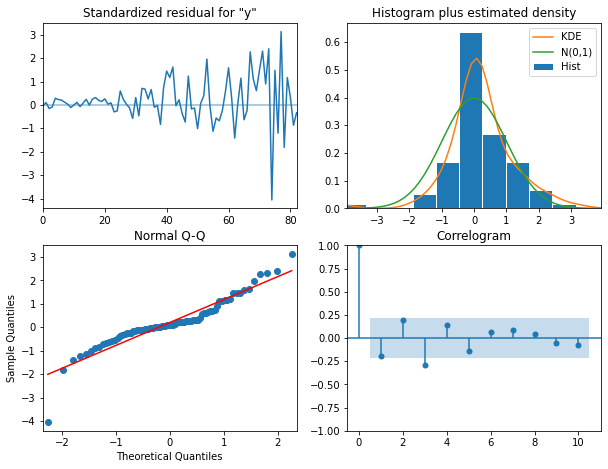

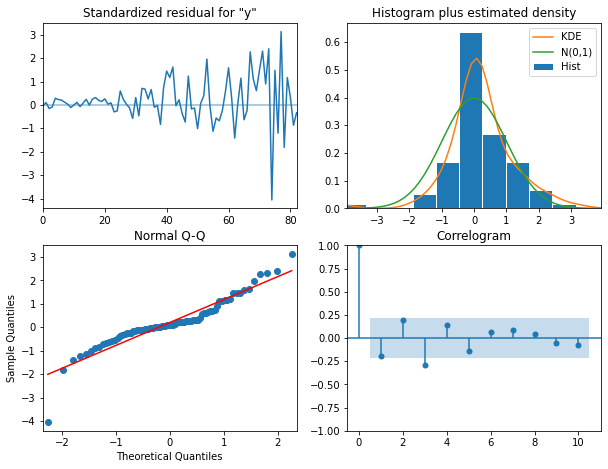

In [17]:
model = ARIMA(data, order=(4, 1, 1))
model_fit = model.fit()
print(model_fit.summary())
model_fit.plot_diagnostics()

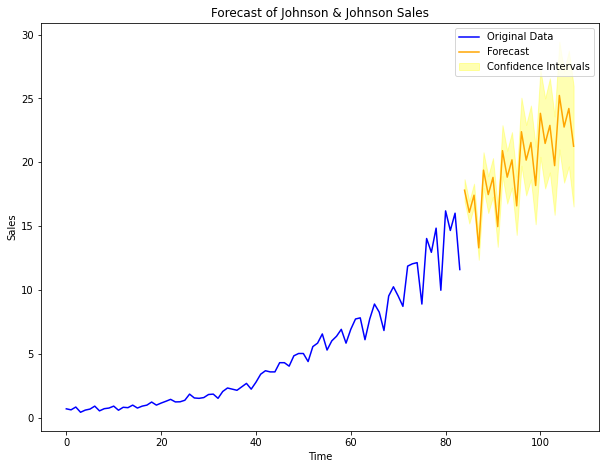

In [22]:
predictions_int = model_fit.get_forecast(steps=24)
forecasted_values = predictions_int.predicted_mean
conf_int = predictions_int.conf_int()

idx = np.arange(len(data), len(data) + 24)

plt.plot(data, color='blue', label='Original Data')
plt.plot(idx, forecasted_values, color='orange', label='Forecast')
plt.fill_between(idx, conf_int[:, 0], conf_int[:, 1], color='yellow', alpha=0.3, label='Confidence Intervals')
plt.title('Forecast of Johnson & Johnson Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

# ARIMA -  Amazon Sales Prediction

In [99]:
df = pd.read_csv('AMZN.csv')

In [100]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-20,72.324501,74.438499,72.324501,73.417503,73.417503,129984000
1,2018-02-21,74.250000,75.174500,73.945999,74.146004,74.146004,126088000
2,2018-02-22,74.767998,75.126999,73.788002,74.266998,74.266998,97162000
3,2018-02-23,74.766998,75.000000,74.324997,75.000000,75.000000,88362000
4,2018-02-26,75.459999,76.141998,75.349998,76.097504,76.097504,99100000


In [101]:
df['Date'] = pd.to_datetime(df['Date'])

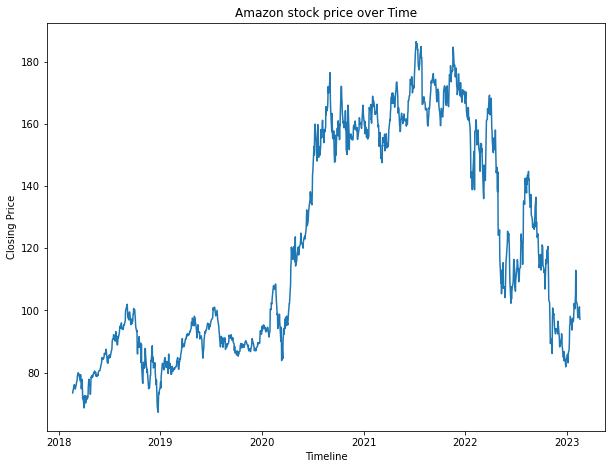

In [102]:
plt.plot(df['Date'], df['Close'])
plt.title('Amazon stock price over Time')
plt.xlabel('Timeline')
plt.ylabel('Closing Price')
plt.show()

In [103]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,120.663254,122.124638,119.039742,120.591815,120.591815,8.545871e+07
std,34.824329,35.191093,34.406018,34.756745,34.756745,3.952944e+07
min,67.300003,69.801498,65.349998,67.197998,67.197998,1.762600e+07
25%,89.720249,90.347000,88.685001,89.639252,89.639252,5.876900e+07
50%,108.103500,110.780502,106.320000,108.000000,108.000000,7.434830e+07
75%,158.343750,159.924003,156.199997,158.086998,158.086998,1.007690e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08


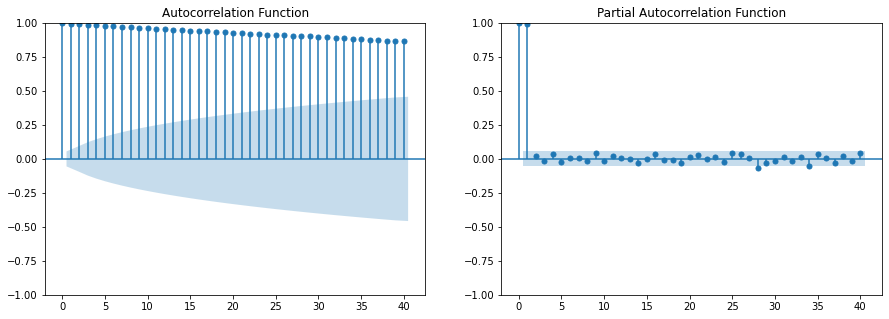

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(df['Close'], ax=ax[0], lags=40)
ax[0].set_title('Autocorrelation Function')
plot_pacf(df['Close'], ax=ax[1], lags=40, method='ywm')
ax[1].set_title('Partial Autocorrelation Function')
plt.show()

In [105]:
adf_result = adfuller(df['Close'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -1.6578089913331724
p-value: 0.4529710546516677


A p-value greater than 0.05 suggests non-stationarity

In [106]:
data = df['Close'].values
log_data = np.log(data)
stationary_data = np.diff(log_data)
stationary_data_positive = stationary_data + 1
transformed_data, lambda_value = boxcox(stationary_data_positive)
print("Lambda value from Box-Cox transformation:", lambda_value)

Lambda value from Box-Cox transformation: 2.036798872825744


In [107]:
model = pm.auto_arima(transformed_data, start_p=0, d=1, start_q=0, max_p=8, max_d=1, max_q=8, seasonal=False,
                      trace=False, error_action='ignore', suppress_warnings=True)

In [108]:
print("Best ARIMA model order:", model.order)
print("AIC value for the best model:", model.aic())

Best ARIMA model order: (8, 1, 2)
AIC value for the best model: -5872.753968770137


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1259
Model:                 ARIMA(8, 1, 2)   Log Likelihood               -3058.351
Date:                Thu, 10 Apr 2025   AIC                           6138.702
Time:                        23:45:33   BIC                           6195.212
Sample:                             0   HQIC                          6159.939
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4827      0.660     -0.731      0.465      -1.776       0.811
ar.L2          0.1495      0.595      0.251      0.802      -1.017       1.316
ar.L3         -0.0326      0.028     -1.165      0.2

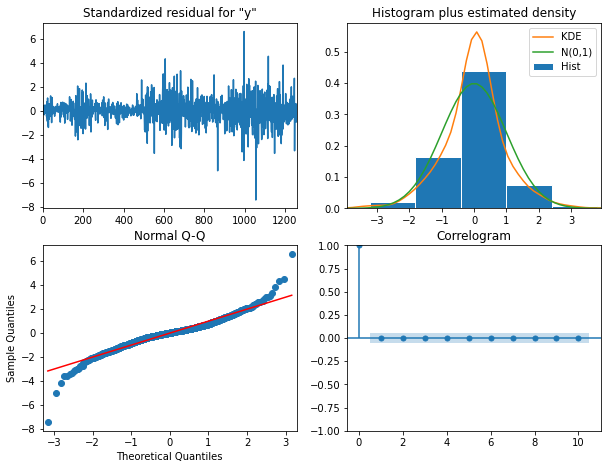

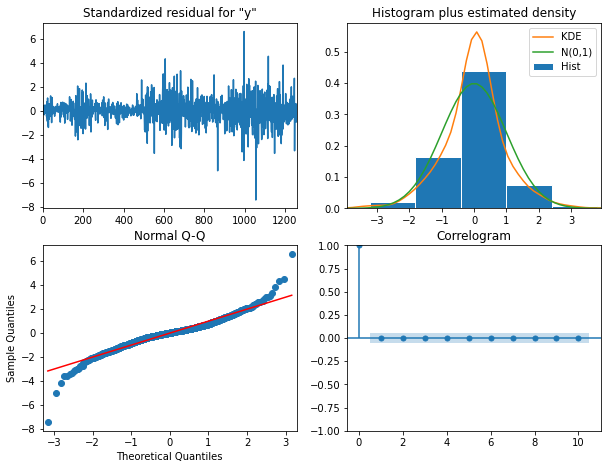

In [109]:
model = ARIMA(data, order=(8, 1, 2))
model_fit = model.fit()
print(model_fit.summary())
model_fit.plot_diagnostics()

In [112]:
forecast_result = model_fit.get_forecast(steps=504)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()
last_date = df['Date'].iloc[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=504, freq='B')

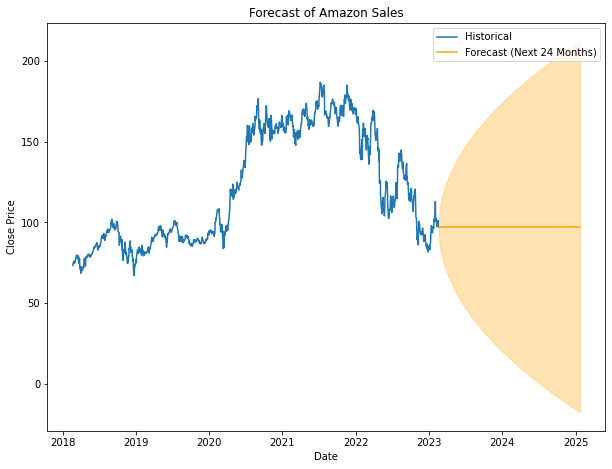

In [116]:
plt.plot(df['Date'], df['Close'], label='Historical')
plt.plot(forecast_dates, forecast_mean, color='orange', label='Forecast (Next 24 Months)')
plt.fill_between(forecast_dates, forecast_ci[:, 0], forecast_ci[:, 1], color='orange', alpha=0.3)
plt.title('Forecast of Amazon Sales')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# RNN - GRU

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization

In [72]:
df = pd.read_csv('AMZN.csv')

In [73]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-20,72.324501,74.438499,72.324501,73.417503,73.417503,129984000
1,2018-02-21,74.250000,75.174500,73.945999,74.146004,74.146004,126088000
2,2018-02-22,74.767998,75.126999,73.788002,74.266998,74.266998,97162000
3,2018-02-23,74.766998,75.000000,74.324997,75.000000,75.000000,88362000
4,2018-02-26,75.459999,76.141998,75.349998,76.097504,76.097504,99100000


In [74]:
x = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]; y = df['Close']

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [77]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

In [83]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (881, 5)
Testing data shape: (378, 5)


In [84]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [85]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (881, 5, 1)
Testing data shape: (378, 5, 1)


In [89]:
model = Sequential()

# Layer 1: GRU + BatchNorm
model.add(GRU(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())

# Layer 2: GRU
model.add(GRU(units=64, return_sequences=False))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 5, 64)             12864     
                                                                 
 batch_normalization_4 (Batc  (None, 5, 64)            256       
 hNormalization)                                                 
                                                                 
 gru_5 (GRU)                 (None, 64)                24960     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                      

In [90]:
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
28/28 [==============================] - 4s 8ms/step - loss: 15603.6768
Epoch 2/50
28/28 [==============================] - 0s 7ms/step - loss: 14723.4844
Epoch 3/50
28/28 [==============================] - 0s 7ms/step - loss: 12990.5508
Epoch 4/50
28/28 [==============================] - 0s 8ms/step - loss: 9874.0967
Epoch 5/50
28/28 [==============================] - 0s 7ms/step - loss: 5032.8330
Epoch 6/50
28/28 [==============================] - 0s 7ms/step - loss: 1800.4399
Epoch 7/50
28/28 [==============================] - 0s 7ms/step - loss: 1244.3385
Epoch 8/50
28/28 [==============================] - 0s 7ms/step - loss: 1235.4249
Epoch 9/50
28/28 [==============================] - 0s 7ms/step - loss: 1232.9729
Epoch 10/50
28/28 [==============================] - 0s 7ms/step - loss: 1225.4396
Epoch 11/50
28/28 [==============================] - 0s 7ms/step - loss: 1135.1720
Epoch 12/50
28/28 [==============================] - 0s 7ms/step - loss: 823.8151
Epoch 13/50

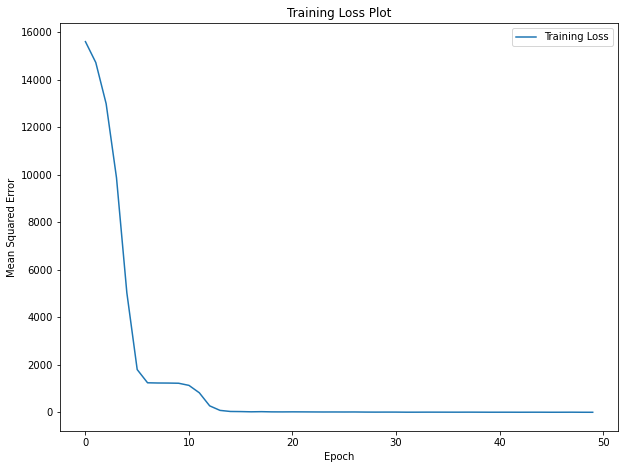

In [92]:
loss = history.history['loss']
plt.plot(loss, label='Training Loss')
plt.title('Training Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [96]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

last_known_inputs = x_scaled[-1].reshape(1, x.shape[1], 1)

future_preds = []

current_input = last_known_inputs.copy()

for _ in range(504):
    next_pred = model.predict(current_input, verbose=0)[0][0]
    future_preds.append(next_pred)
    new_input_flat = current_input.reshape(-1)
    new_input_flat[3] = next_pred
    new_input_scaled = new_input_flat.reshape(1, -1)
    current_input = new_input_scaled.reshape(1, x.shape[1], 1)

In [97]:
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=504, freq='B')

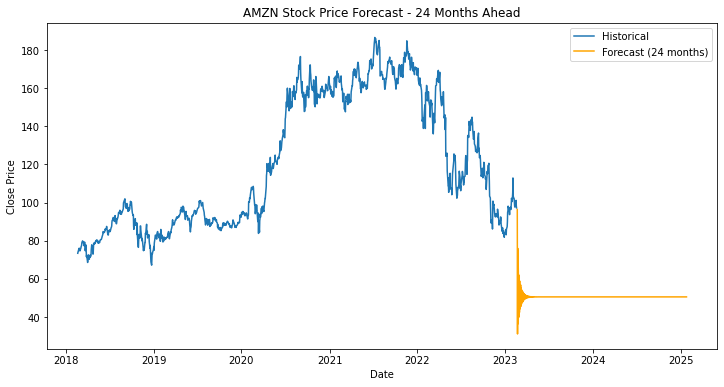

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Historical')
plt.plot(future_dates, future_preds, label='Forecast (24 months)', color='orange')
plt.title('Forecast of Amazon Sales')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()